### COVID-19 
### UPDATE by DAY in the countries: 
#### CHINA, GERMANY, ITALY, KOREA, JAPAN, USA, AUSTRALIA, LUXEMBOURG, UK, CANADA, VIETNAM
#### (Start recorded day: 22.01.2020)

In [1]:
from covid import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


In [2]:
len(countries_no_infopopulation)

35

In [3]:
countries_no_infopopulation

['Gibraltar',
 'East Timor',
 'Reunion',
 'Channel Islands',
 'Cape Verde',
 'Curacao',
 'Puerto Rico',
 'Hong Kong',
 'Guernsey',
 'Ivory Coast',
 'St. Martin',
 'Guadeloupe',
 'Saint Barthelemy',
 'French Guiana',
 'Republic of the Congo',
 'Taipei and environs',
 'Guam',
 'The Bahamas',
 'Aruba',
 'North Ireland',
 'Saint Martin',
 'Republic of Moldova',
 'Macau',
 'The Gambia',
 'Palestine',
 'Mayotte',
 'occupied Palestinian territory',
 'Greenland',
 'Vatican City',
 'Jersey',
 'Faroe Islands',
 'Martinique',
 'Cayman Islands',
 ' Azerbaijan',
 'Others_and_ships']

### Number of covid-19 outbreak days 

In [4]:
rcParams['figure.figsize'] = 20, 10
len(data)

522

In [5]:
updated_date=files[-1].split('.')[0]
updated_date

'06-26-2021'

### COVID situation in the World is being changed by day
### ARE WE BEATING COVID-19?

The World still has 58446760.0 active cases

In last 7 days:  [58175798. 58108899. 58168650. 58196639. 58302153. 58385964. 58446760.]


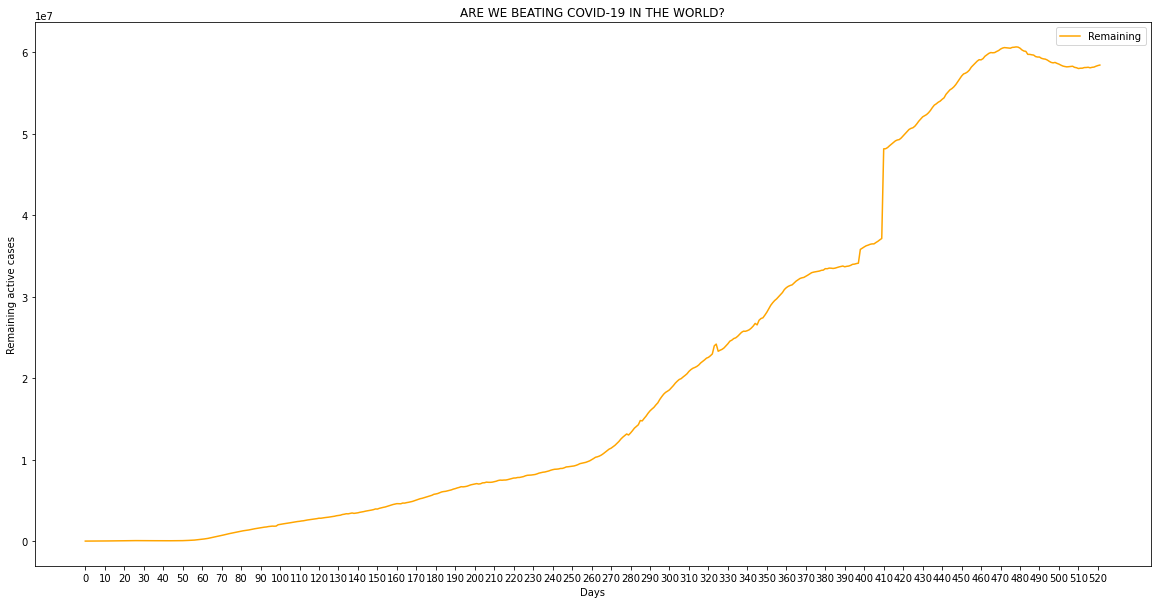

In [6]:
remaining_by_day = np.array(totalconfirmed_by_day) - np.array(totalrecovered_by_day) - np.array(totalfatalities_by_day)

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, remaining_by_day, color='orange', label='Remaining')
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid.jpg')
print("The World still has %0.1f active cases\n"% remaining_by_day[-1])
print("In last 7 days: ", remaining_by_day[-7:])

In [7]:
countries_remaining = countries_confirmed-countries_fatalities-countries_recovered
# Mitigate the negative values by converting all negative values to 0
countries_remaining.mask(countries_remaining<0, 0, inplace=True)

countries_remaining.tail(1)

,Jamaica,Grenada,Gibraltar,Poland,Benin,Laos,Colombia,Croatia,Antigua and Barbuda,Iraq,...,Canada,Sao Tome and Principe,Cayman Islands,Lesotho,Azerbaijan,Czechia,West Bank and Gaza,Malaysia,Palau,Others_and_ships
521,19260.0,0.0,0.0,153235.0,66.0,125.0,192839.0,560.0,0.0,77212.0,...,9149.0,10.0,0.0,4463.0,0.0,1791.0,2728.0,60646.0,0.0,0.0


#### Notes: remaining number does not include the recovered data in US

In [8]:
daily_confirmed_sum = np.array([sum(countries_confirmed.iloc[i]) for i in range(len(countries_confirmed))])
daily_fatal_sum = np.array([sum(countries_fatalities.iloc[i]) for i in range(len(countries_fatalities))])
daily_recovered_sum = np.array([sum(countries_recovered.iloc[i]) for i in range(len(countries_recovered))])

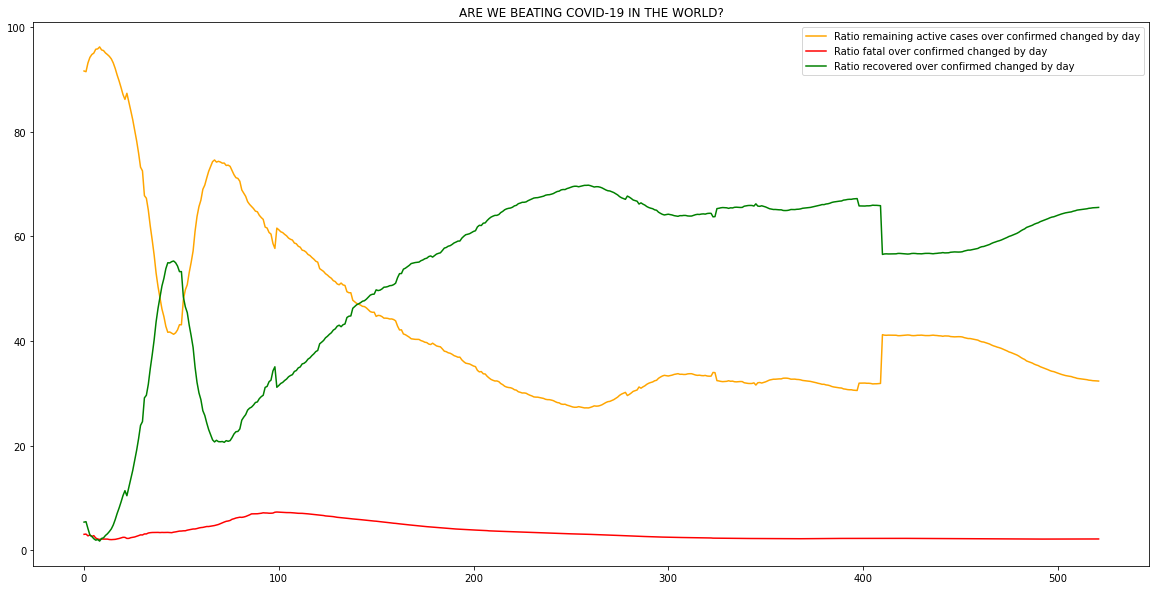

In [9]:
plt.plot(x_dat, ((daily_confirmed_sum-daily_recovered_sum-daily_fatal_sum)/daily_confirmed_sum)*100, color='orange', label='Ratio remaining active cases over confirmed changed by day')
plt.plot(x_dat, (daily_fatal_sum/daily_confirmed_sum)*100, color='red', label='Ratio fatal over confirmed changed by day')
plt.plot(x_dat, (daily_recovered_sum/daily_confirmed_sum)*100, color='green', label='Ratio recovered over confirmed changed by day')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid_ratio.jpg')

### Countries are beating COVID most

,521
Others_and_ships,0.0
Ivory Coast,0.0
MS Zaandam,0.0
occupied Palestinian territory,0.0
Mayotte,0.0
Palestine,0.0
The Gambia,0.0
St. Martin,0.0
Macau,0.0
Solomon Islands,0.0


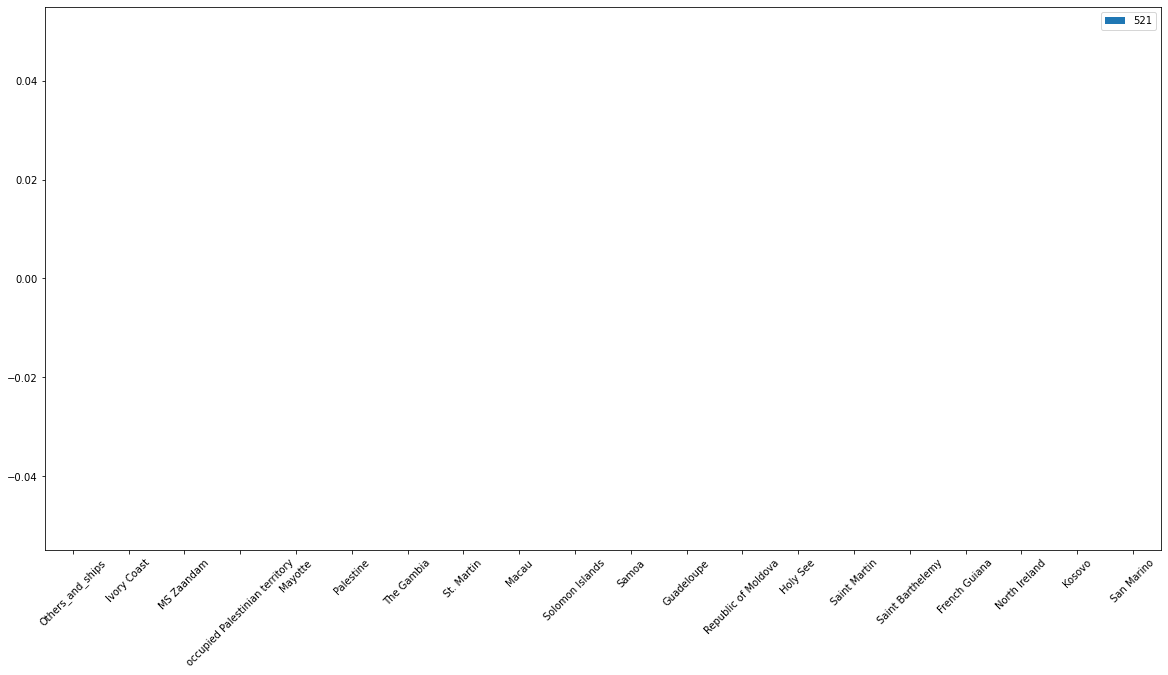

In [10]:
index = countries_remaining.tail(1)
top_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=True).head(20)
top_remaining.plot(kind='bar')
plt.xticks(rotation=45)
top_remaining

,Others_and_ships,Ivory Coast,MS Zaandam,occupied Palestinian territory,Mayotte,Palestine,The Gambia,St. Martin,Macau,Solomon Islands,Samoa,Guadeloupe,Republic of Moldova,Holy See,Saint Martin,Saint Barthelemy,French Guiana,North Ireland,Kosovo,San Marino
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


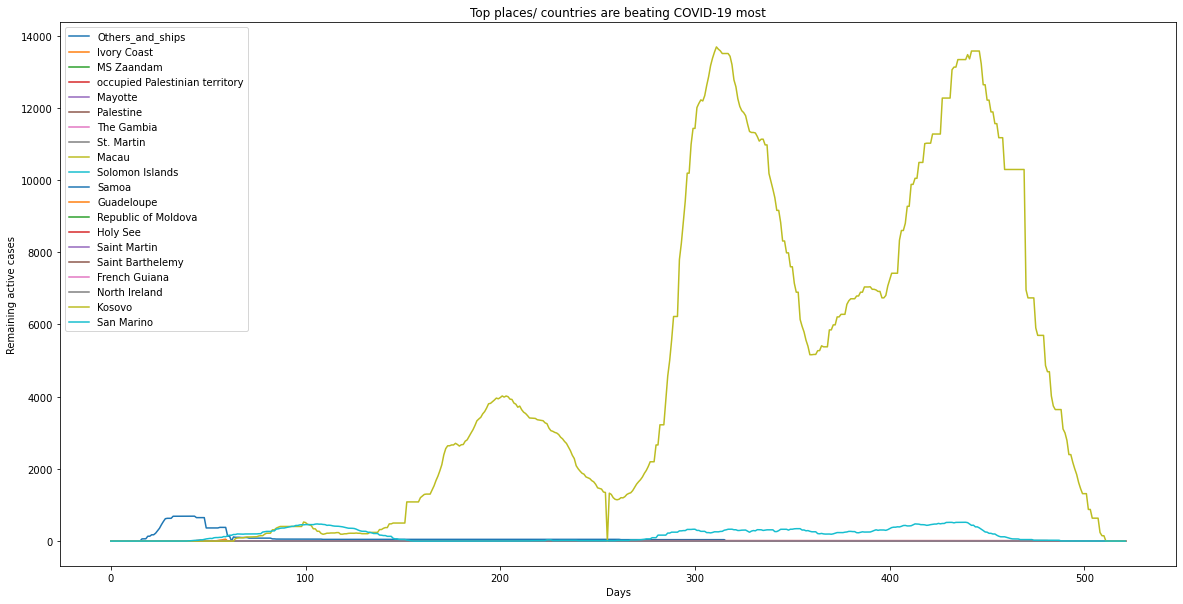

In [11]:
countries_remaining[top_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries are beating COVID-19 most")
countries_remaining[top_remaining.index]

### Countries are beating COVID least

,521
US,33017608.0
France,5314949.0
United Kingdom,4589940.0
Spain,3551308.0
Brazil,1727551.0
Netherlands,1665161.0
Sweden,1074277.0
Belgium,1057316.0
Serbia,709209.0
India,586403.0


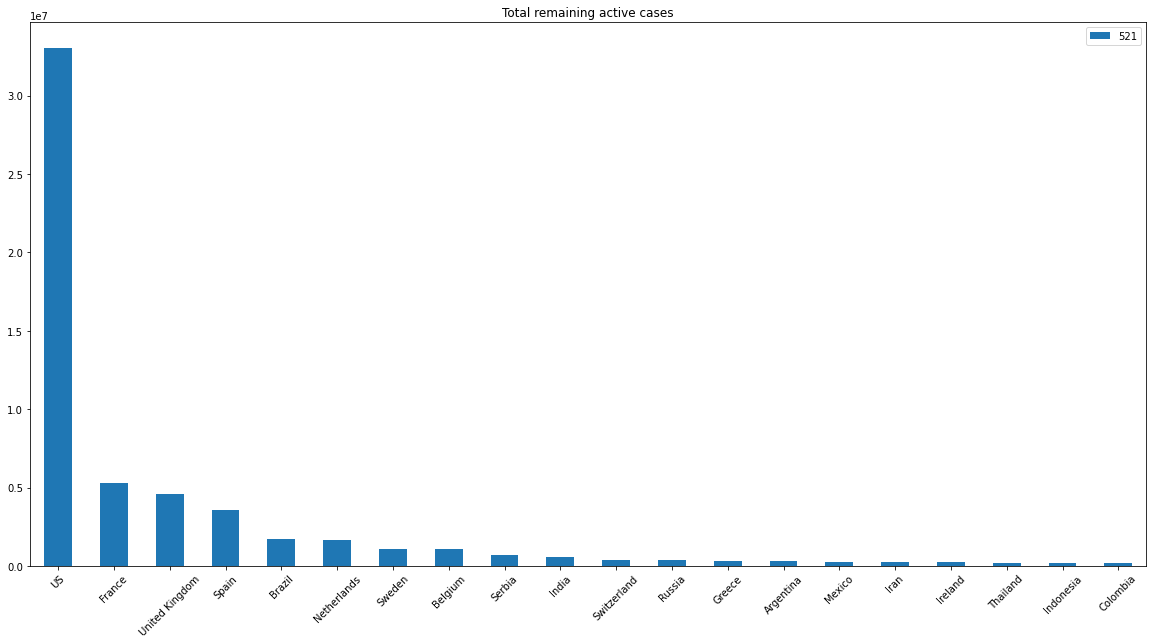

In [12]:
bottom_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=False).head(20)
bottom_remaining.plot(kind='bar')
plt.title("Total remaining active cases")
plt.xticks(rotation=45)
bottom_remaining

Text(0.5, 1.0, 'Top places/ countries are beating COVID-19 least')

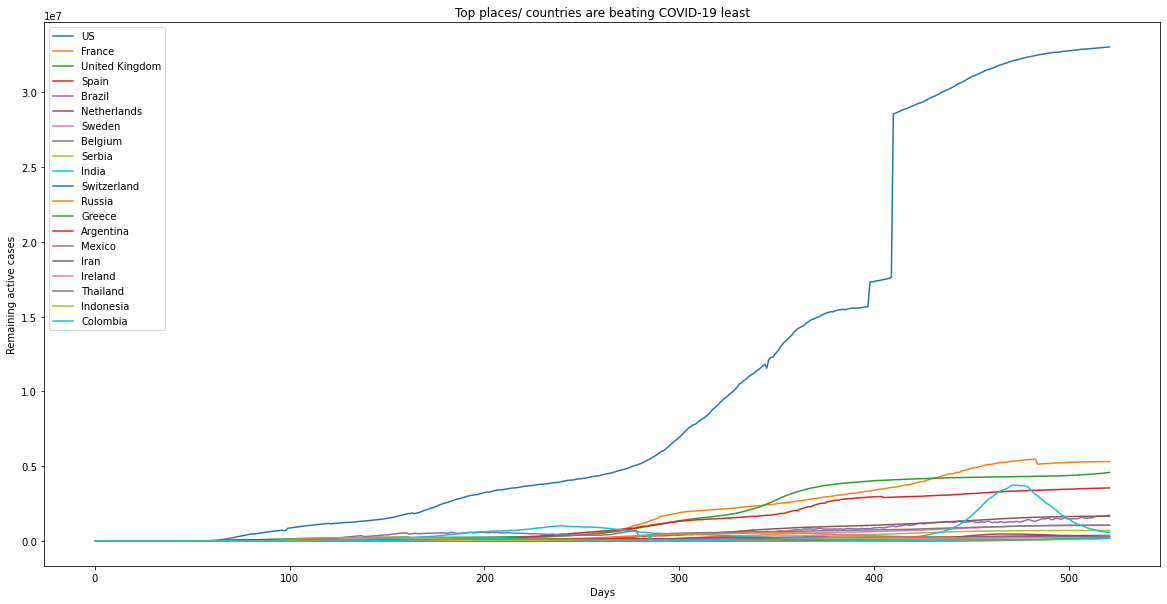

In [13]:
countries_remaining[bottom_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries are beating COVID-19 least")

#### The current remaining days is not included with the recovered data from US. 
#### See: https://github.com/CSSEGISandData/COVID-19/issues/3464